Informalidad laboral y brecha entre las tasas netas de participacion femenina y masculina. Parte1
=========================================================================================

Objetivo
--------
Combino dos archivos, uno de formato csv y otro xls. Se limpian los datos y se elige una muestra de datos, para explorar la relación entre variables. Se contruyen tablas auxiliares para realizar un análisis de la información de la tabla en su totalidad. Primero hago una revisión del comportamiento de los datos para un año y posterioremente para una muestra de más años.

Algunas preguntas que se pueden hacer son:

  * ¿Cómo se comporta la tasa de informalidad entre géneros y grupos de edad?
  * ¿Cómo se comporta la informalidad por entidad federativa y género?
  * ¿Cómo se comporta la brecha laboral por grupo de edades y entidad federativa?
  * ¿Cómo se comporta la brecha laboral por genero?

Datos
-----
 Los datos que se usan son correspondientes a las tasas de participación laboral por género y la tasa de informalidad laboral. Para mayor detalle se puede consultar la descripción desde las siguiente fuentes:
  * [Tasa Neta de Participación por Género](http://busca.datos.gob.mx/#!/conjuntos/objetivos-de-desarrollo-sostenible-brecha-entre-la-tasa-neta-de-participacion-femenina-y-la-tas/)
  * [Tasa de Informalidad](http://busca.datos.gob.mx/#!/conjuntos/objetivos-de-desarrollo-sostenible-tasa-de-informalidad-laboral-til--1/)

In [1]:
#Se cargan las librerías requeridas
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from __future__ import division
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(20,7)

In [2]:
#Se carga el primer archivo, la informacion es la población en trabajos informales por estado y año
Informalidad=pd.read_excel('/home/dlegorreta/Documentos/Tutorial-Python/Datos/Base_Tasa_de_informalidad.xlsx')

In [3]:
#Se cargan los datos sobre la brecha laboral
Brecha=pd.read_csv('/home/dlegorreta/Documentos/Tutorial-Python/Datos/Base_Brecha_entre_la_TNP_femenina_y_TNP_masculina.csv')

In [4]:
#Se visualiza los primeros registros para las dos tablas
Informalidad.head()

,Periodo,Entidad_Federativa,Sexo,Gpo_edad,Trab_agrop_informal,Trab_sec_informal,Trab_informales_sec_formal,Trab_domes_informal,Pob_ocup_total
0,1995,Nacional,Hombres,De 15 a 29 años,2395879,2249114,1334886,28968,8976920
1,1995,Nacional,Hombres,De 30 y mas años,3453003,3356222,920094,50042,12801482
2,1995,Nacional,Mujeres,De 15 a 29 años,364127,996917,799807,461776,4566136
3,1995,Nacional,Mujeres,De 30 y mas años,613826,1942557,605157,398367,5830348
4,1996,Aguascalientes,Hombres,De 15 a 29 años,13669,18913,11595,94,83063


In [5]:
Brecha.head()

,Periodo,Entidad_Federativa,Grupo_edad,Poblacion_economicamente_activa_mujeres,Poblacion_en_edad_de_trabajar_mujeres,Tasa_neta_de_participacion_mujeres,Poblacion_economicamente_activa_hombres,Poblacion_en_edad_de_trabajar_hombres,Tasa_neta_de_participacion_hombres
0,1995,Nacional,De 15 a 29 a�os,5256386,13256824,39.65041702,9786726,12559877,77.92055607
1,1995,Nacional,De 30 a�os y m�s,6119608,16967269,36.06713608,13391135,15447857,86.68603678
2,1995,Aguascalientes,De 15 a 29 a�os,ND,ND,ND,ND,ND,ND
3,1995,Aguascalientes,De 30 a�os y m�s,ND,ND,ND,ND,ND,ND
4,1995,Baja California,De 15 a 29 a�os,ND,ND,ND,ND,ND,ND


Se aprecia que la tabla **"Brecha"** cuenta con datos ND, pero antes de limpiar el archivo  o quitar los missing data, exploro el tipo de datos de cada columna.

In [6]:
Informalidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2188 entries, 0 to 2187
Data columns (total 9 columns):
Periodo                       2188 non-null int64
Entidad_Federativa            2188 non-null object
Sexo                          2188 non-null object
Gpo_edad                      2188 non-null object
Trab_agrop_informal           2188 non-null int64
Trab_sec_informal             2188 non-null int64
Trab_informales_sec_formal    2188 non-null int64
Trab_domes_informal           2188 non-null int64
Pob_ocup_total                2188 non-null int64
dtypes: int64(6), object(3)
memory usage: 153.9+ KB


In [7]:
Brecha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1386 entries, 0 to 1385
Data columns (total 9 columns):
Periodo                                    1386 non-null int64
Entidad_Federativa                         1386 non-null object
Grupo_edad                                 1386 non-null object
Poblacion_economicamente_activa_mujeres    1386 non-null object
Poblacion_en_edad_de_trabajar_mujeres      1386 non-null object
Tasa_neta_de_participacion_mujeres         1386 non-null object
Poblacion_economicamente_activa_hombres    1386 non-null object
Poblacion_en_edad_de_trabajar_hombres      1386 non-null object
Tasa_neta_de_participacion_hombres         1386 non-null object
dtypes: int64(1), object(8)
memory usage: 97.5+ KB


Además de ver los tipo de datos, lo titulos de la tabla **"Brecha"** son muy largos, para facilitar el tratamiento de los datos cambio los nombres de las variables o columnas. Los títulos de la tabla **"informalidad"** también los cambio por algo más breve.

In [8]:
Brecha.columns=['Periodo','Entidad','Grupo_Edad','PEA_M','PET_M','TNP_M','PEA_H','PET_H','TNP_H']
Informalidad.columns=['Periodo','Entidad','Sexo','Grupo_Edad','TAgroInf','TSecInf','TInfSecFor','TDomesInf','Pob_Ocup_T']

In [9]:
Brecha.head()

,Periodo,Entidad,Grupo_Edad,PEA_M,PET_M,TNP_M,PEA_H,PET_H,TNP_H
0,1995,Nacional,De 15 a 29 a�os,5256386,13256824,39.65041702,9786726,12559877,77.92055607
1,1995,Nacional,De 30 a�os y m�s,6119608,16967269,36.06713608,13391135,15447857,86.68603678
2,1995,Aguascalientes,De 15 a 29 a�os,ND,ND,ND,ND,ND,ND
3,1995,Aguascalientes,De 30 a�os y m�s,ND,ND,ND,ND,ND,ND
4,1995,Baja California,De 15 a 29 a�os,ND,ND,ND,ND,ND,ND


In [10]:
Informalidad.head()

,Periodo,Entidad,Sexo,Grupo_Edad,TAgroInf,TSecInf,TInfSecFor,TDomesInf,Pob_Ocup_T
0,1995,Nacional,Hombres,De 15 a 29 años,2395879,2249114,1334886,28968,8976920
1,1995,Nacional,Hombres,De 30 y mas años,3453003,3356222,920094,50042,12801482
2,1995,Nacional,Mujeres,De 15 a 29 años,364127,996917,799807,461776,4566136
3,1995,Nacional,Mujeres,De 30 y mas años,613826,1942557,605157,398367,5830348
4,1996,Aguascalientes,Hombres,De 15 a 29 años,13669,18913,11595,94,83063


El tipo de datos como se cargan los datos por medio de **Pandas** se visualiza con el sigueinte comando:
~~~python
Brecha.info()
~~~
Se observa que en el entorno de trabajo, el tipo *'object'*, que son algo así como tipo 'string' en un contexto de bases de datos o sql. Así que para poder procesar la información hago el cambio a tipo de datos numérico. En la tabla "Informalidad" no hago ningún cambio, los datos quedan cargados con el tipo de datos que se requiere para el análisis.

In [11]:
#Cambio el tipo de datos a numérico
Brecha['PEA_M']=pd.to_numeric(Brecha['PEA_M'],errors='coercion')
Brecha['PET_M']=pd.to_numeric(Brecha['PET_M'],errors='coercion')
Brecha['TNP_M']=pd.to_numeric(Brecha['TNP_M'],errors='coercion')
Brecha['PEA_H']=pd.to_numeric(Brecha['PEA_H'],errors='coercion')
Brecha['PET_H']=pd.to_numeric(Brecha['PET_H'],errors='coercion')
Brecha['TNP_H']=pd.to_numeric(Brecha['TNP_H'],errors='coercion')

In [12]:
#Reviso el nuevo tipo de dato
Brecha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1386 entries, 0 to 1385
Data columns (total 9 columns):
Periodo       1386 non-null int64
Entidad       1386 non-null object
Grupo_Edad    1386 non-null object
PEA_M         1194 non-null float64
PET_M         1194 non-null float64
TNP_M         1194 non-null float64
PEA_H         1194 non-null float64
PET_H         1194 non-null float64
TNP_H         1194 non-null float64
dtypes: float64(6), int64(1), object(2)
memory usage: 97.5+ KB


In [13]:
#Se visualizan de nuevo los primeros 5 registros de los datos
Brecha.head()

,Periodo,Entidad,Grupo_Edad,PEA_M,PET_M,TNP_M,PEA_H,PET_H,TNP_H
0,1995,Nacional,De 15 a 29 a�os,5256386.0,13256824.0,39.650417,9786726.0,12559877.0,77.920556
1,1995,Nacional,De 30 a�os y m�s,6119608.0,16967269.0,36.067136,13391135.0,15447857.0,86.686037
2,1995,Aguascalientes,De 15 a 29 a�os,NaN,NaN,NaN,NaN,NaN,NaN
3,1995,Aguascalientes,De 30 a�os y m�s,NaN,NaN,NaN,NaN,NaN,NaN
4,1995,Baja California,De 15 a 29 a�os,NaN,NaN,NaN,NaN,NaN,NaN


Ahora el problema que se presenta al observar los datos son los registros **"NaN"**, lo que hago es primero conocer la cantidad de registros que se tienen y después se *"limpia"* el DataFrame para no considerarlos en el análisis.

In [14]:
#Cálculo de la cantidad de NaN
Brecha.isnull().sum()

Periodo         0
Entidad         0
Grupo_Edad      0
PEA_M         192
PET_M         192
TNP_M         192
PEA_H         192
PET_H         192
TNP_H         192
dtype: int64

In [15]:
#Se revisan los nulos o NaN en la tabla informalidad
Informalidad.isnull().sum()

Periodo       0
Entidad       0
Sexo          0
Grupo_Edad    0
TAgroInf      0
TSecInf       0
TInfSecFor    0
TDomesInf     0
Pob_Ocup_T    0
dtype: int64

En este caso lo que haré es eliminar todos los datos **NaN** de la tabla Brecha, y revisar la cantidad de registros que se tienen por año. 

In [16]:
#Se define otra DataFrame sin datos NaN
Brecha=Brecha.dropna()

In [17]:
Brecha.isnull().sum()

Periodo       0
Entidad       0
Grupo_Edad    0
PEA_M         0
PET_M         0
TNP_M         0
PEA_H         0
PET_H         0
TNP_H         0
dtype: int64

El DataFrame queda sin **NaN**, ahora lo que falta es explorar cuantos registros quedan por cada año para elegir una muestra anual y luego definir el rango de años que se analizarán o explorarán.

In [18]:
#Visualizo cuantas filas y columnas se tienen por cada año.
for i in range(1995,2015):
    print " En el año",i, "se tiene ",Brecha[Brecha['Periodo']==i].shape,"número de filas y columnas, respectivamente."

 En el año 1995 se tiene  (2, 9) número de filas y columnas, respectivamente.
 En el año 1996 se tiene  (66, 9) número de filas y columnas, respectivamente.
 En el año 1997 se tiene  (2, 9) número de filas y columnas, respectivamente.
 En el año 1998 se tiene  (66, 9) número de filas y columnas, respectivamente.
 En el año 1999 se tiene  (2, 9) número de filas y columnas, respectivamente.
 En el año 2000 se tiene  (66, 9) número de filas y columnas, respectivamente.
 En el año 2001 se tiene  (66, 9) número de filas y columnas, respectivamente.
 En el año 2002 se tiene  (66, 9) número de filas y columnas, respectivamente.
 En el año 2003 se tiene  (66, 9) número de filas y columnas, respectivamente.
 En el año 2004 se tiene  (66, 9) número de filas y columnas, respectivamente.
 En el año 2005 se tiene  (66, 9) número de filas y columnas, respectivamente.
 En el año 2006 se tiene  (66, 9) número de filas y columnas, respectivamente.
 En el año 2007 se tiene  (66, 9) número de filas y col

In [19]:
for i in range(1995,2015):
    print " En el año",i, "se tiene ",Informalidad[Informalidad['Periodo']==i].shape,"número de filas y columnas, respectivamente."

 En el año 1995 se tiene  (4, 9) número de filas y columnas, respectivamente.
 En el año 1996 se tiene  (128, 9) número de filas y columnas, respectivamente.
 En el año 1997 se tiene  (4, 9) número de filas y columnas, respectivamente.
 En el año 1998 se tiene  (128, 9) número de filas y columnas, respectivamente.
 En el año 1999 se tiene  (4, 9) número de filas y columnas, respectivamente.
 En el año 2000 se tiene  (128, 9) número de filas y columnas, respectivamente.
 En el año 2001 se tiene  (128, 9) número de filas y columnas, respectivamente.
 En el año 2002 se tiene  (128, 9) número de filas y columnas, respectivamente.
 En el año 2003 se tiene  (128, 9) número de filas y columnas, respectivamente.
 En el año 2004 se tiene  (128, 9) número de filas y columnas, respectivamente.
 En el año 2005 se tiene  (128, 9) número de filas y columnas, respectivamente.
 En el año 2006 se tiene  (128, 9) número de filas y columnas, respectivamente.
 En el año 2007 se tiene  (128, 9) número de f

Se observa que en la tabla **Informalidad** se tiene el doble de filas por año, esto debido a que se tienen medidas por género. Elijo para explorar inicialmente los datos en el año **1998** y uso de  muestra de datos los correspondientes a los años **2000-2014** para hacer un análisis más detallado.

Análisis del año 1998
---------------------

Construyo dos DataFrame con los cuales analizo los datos en el año 1998, cada uno correspondiente a los datos de la tabla Brecha e Informalidad.

In [20]:
Informalidad_1998=Informalidad[Informalidad['Periodo']==1998]

In [21]:
#Reviso los primeros 10 registros
Informalidad_1998.head(7)

,Periodo,Entidad,Sexo,Grupo_Edad,TAgroInf,TSecInf,TInfSecFor,TDomesInf,Pob_Ocup_T
136,1998,Aguascalientes,Hombres,De 15 a 29 años,10654,18002,13682,140,87009
137,1998,Aguascalientes,Hombres,De 30 y mas años,22786,31627,8857,614,130601
138,1998,Aguascalientes,Mujeres,De 15 a 29 años,1166,6073,9650,3528,51803
139,1998,Aguascalientes,Mujeres,De 30 y mas años,981,12806,7962,5830,58886
140,1998,Baja California,Hombres,De 15 a 29 años,8638,53319,34202,256,253283
141,1998,Baja California,Hombres,De 30 y mas años,13585,90320,56228,1665,338746
142,1998,Baja California,Mujeres,De 15 a 29 años,2644,11793,17548,3865,133134


Revisando las columnas, se ve que cuatro columnas corresponden a trabajos informales y la última a la población ocupada laboralmente en la entidad, en el género y rango de edades. Con un poco de cuidado, la tabla se muestra como si los datos estuvieran agrupados por año, entidad, género y rango de edad. Entonces lo primero que hago es contruir una columna con el porcentaje que representan las poblaciones en trabajos informales y luego construyo una tabla donde la información sea "desagrupada".

In [23]:
#Se contruye porcentaje de población en trabajos imformales, se agrega una nueva columna. Se usa el método loc[] para operar
#sobre las columnas, para revisar detalles de esto se puede consultar en la libra siguiente 
#http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy 

Valores=np.sum(Informalidad_1998.loc[:,('TAgroInf','TSecInf','TInfSecFor','TDomesInf')],axis=1)
Valores=Valores/Informalidad_1998.loc[:,('Pob_Ocup_T')]   
Informalidad_1998.loc[:,'Porcentaje']=Valores
del(Valores)


In [24]:
Informalidad_1998.head()

,Periodo,Entidad,Sexo,Grupo_Edad,TAgroInf,TSecInf,TInfSecFor,TDomesInf,Pob_Ocup_T,Porcentaje
136,1998,Aguascalientes,Hombres,De 15 a 29 años,10654,18002,13682,140,87009,0.488202
137,1998,Aguascalientes,Hombres,De 30 y mas años,22786,31627,8857,614,130601,0.489154
138,1998,Aguascalientes,Mujeres,De 15 a 29 años,1166,6073,9650,3528,51803,0.394128
139,1998,Aguascalientes,Mujeres,De 30 y mas años,981,12806,7962,5830,58886,0.468346
140,1998,Baja California,Hombres,De 15 a 29 años,8638,53319,34202,256,253283,0.380661


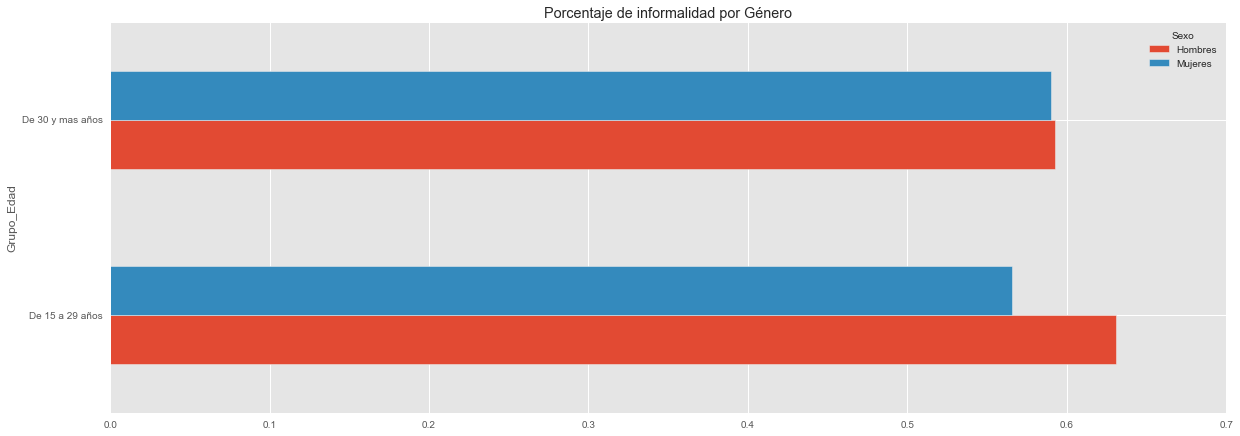

In [25]:
#Gráfica por Grupo de Edad
import sys 
reload(sys)
sys.setdefaultencoding('utf8') # Lo modifico el encoding del sistema para poder escribir los títulos con acentos.

Informalidad_1998.pivot_table(values='Porcentaje',index=['Grupo_Edad'],columns=['Sexo']).plot(kind='barh',title='Porcentaje de informalidad por Género')

Se observa que para las dos categorías de Hombres y Mujeres, después de los 30 años la media de los porcentajes es casi igual, por otro lado cuando tienen menos de 30 años los hombres se integran a trabajos informales con mayor cantidad.

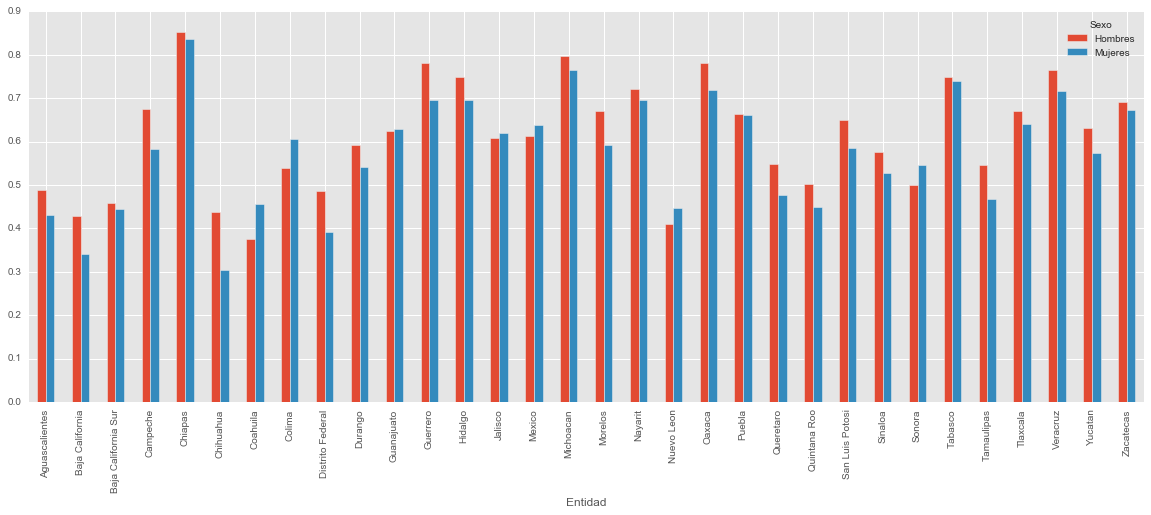

In [26]:
#Por Género y Entidad Federativa
Informalidad_1998.pivot_table(values='Porcentaje',index=['Entidad'],columns=['Sexo']).plot(kind='bar')

Es interesante ver como en **Coahuila, Colima, Guanajuato, Jalisco, México, Nuevo León y Sonora** la población de mujeres trabajan mucho más en informalidad que los hombres.

Agrupando por dos índices, tanto por Género como por grupo de edad, se tienen lo siguiente:

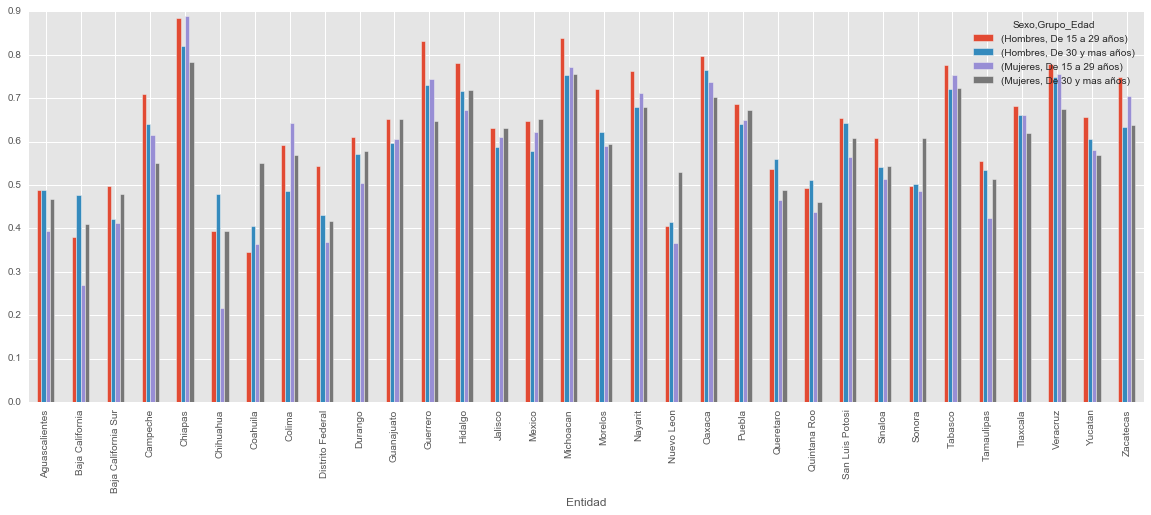

In [27]:
Informalidad_1998.pivot_table(values='Porcentaje',index=['Entidad'],columns=['Sexo','Grupo_Edad']).plot(kind='bar')


Pese a que se ve medio asobronada la gráfica, se observa que el estado de **Cuahuila, Colima, Guanajuato, Jalisco, Nuevo León, Puebla, Sonora y Zacatecas** muestran que el grupo de mujeres con edad mayor de **30 años** sobre pasan la informalidad de manera muy considerable con respecto a los hombres.

Ahora para ver como se comportan las 4 distribuciones de los indicadores de trabajos informales, hago un histograma para cada una de las variables.

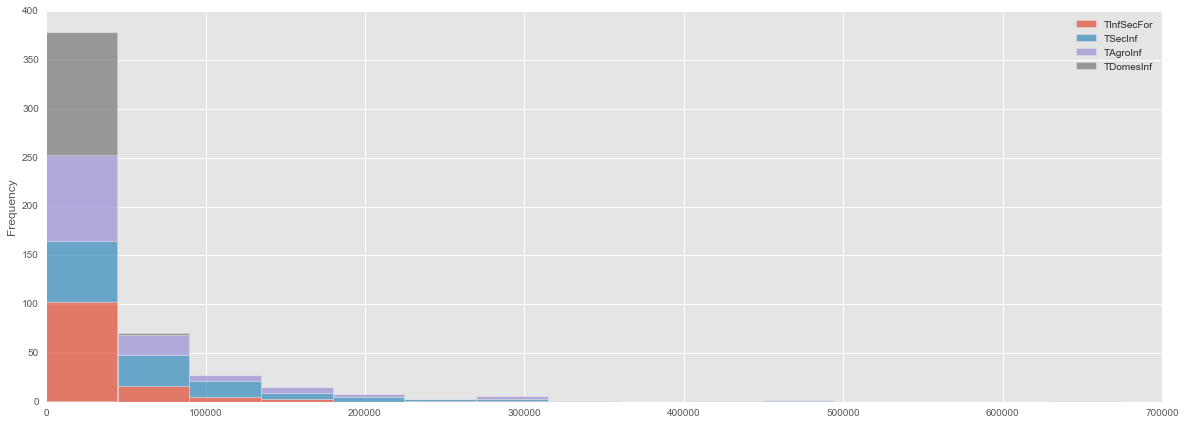

In [28]:
#Las siguientes instrucciones permiten generar una gráfica de los histogramas de las 4 variables 
#hago uso de las gráficas "nativas" de pandas para mostrar el ejemplo, pero se pueden correr el 
#código de abajo y se obtienen un resultado "similar".
#plt.style.use('bmh')
#plt.hist(Informalidad_1998.TInfSecFor,histtype="stepfilled",bins=15, alpha=0.7, normed=True)
#plt.hist(Informalidad_1998.TSecInf,histtype="stepfilled",bins=15, alpha=0.7, normed=True)
#plt.hist(Informalidad_1998.TAgroInf,histtype="stepfilled",bins=15, alpha=0.7, normed=True)
#plt.hist(Informalidad_1998.TDomesInf,histtype="stepfilled",bins=15, alpha=0.7, normed=True)
#plt.legend(['Trabajo Informal en Sector Formal','Trabajo Sector Informal','Trabajo Agro Informal','Trabajo Doméstico Informal'])
#plt.show()
Informalidad_1998[['TInfSecFor','TSecInf','TAgroInf','TDomesInf']].plot(kind='hist',stacked=True,bins=15,alpha=0.7)

Se observa que las distribuciones son de "tipo cola pesada", los valores que se muestran en el eje "y" es la frecuencia de los datos. Pero esto deja ver a grandes razgos como se comportan las medidas de los trabajos informales.

Explorando un poco el comportamiento de los datos de la  **Brecha** laborales entre género, eligo los correspondientes al año 1998.

In [29]:
#Se eligen los datos del año 1998 de la Brecha
Brecha_1998=Brecha[Brecha['Periodo']==1998]

In [30]:
#Se visualizan los primeros registros de los datos
Brecha_1998.head()

,Periodo,Entidad,Grupo_Edad,PEA_M,PET_M,TNP_M,PEA_H,PET_H,TNP_H
198,1998,Nacional,De 15 a 29 a�os,5545770.0,13835171.0,40.084579,9985016.0,12873157.0,77.564625
199,1998,Nacional,De 30 a�os y m�s,7308217.0,18840960.0,38.788984,14865125.0,16919641.0,87.857213
200,1998,Aguascalientes,De 15 a 29 a�os,55506.0,132597.0,41.860676,91648.0,119840.0,76.475300
201,1998,Aguascalientes,De 30 a�os y m�s,59873.0,175483.0,34.118974,133040.0,152586.0,87.190175
202,1998,Baja California,De 15 a 29 a�os,141289.0,315380.0,44.799607,261335.0,330927.0,78.970589


Se observa que las dos primeras filas corresponden a los datos **Nacionales** correspondientes al año 1998, para el análisis elimino esas dos filas.

In [31]:
#Se eliminan las primeras dos lineas o filas para analizados los datos, ya que son el resumen de los datos a nivel nacional.
Brecha_1998=Brecha_1998.iloc[2:,:]
Brecha_1998.head()

,Periodo,Entidad,Grupo_Edad,PEA_M,PET_M,TNP_M,PEA_H,PET_H,TNP_H
200,1998,Aguascalientes,De 15 a 29 a�os,55506.0,132597.0,41.860676,91648.0,119840.0,76.475300
201,1998,Aguascalientes,De 30 a�os y m�s,59873.0,175483.0,34.118974,133040.0,152586.0,87.190175
202,1998,Baja California,De 15 a 29 a�os,141289.0,315380.0,44.799607,261335.0,330927.0,78.970589
203,1998,Baja California,De 30 a�os y m�s,168982.0,412268.0,40.988386,345604.0,400780.0,86.232846
204,1998,Baja California Sur,De 15 a 29 a�os,24942.0,58094.0,42.933866,45428.0,59481.0,76.373968


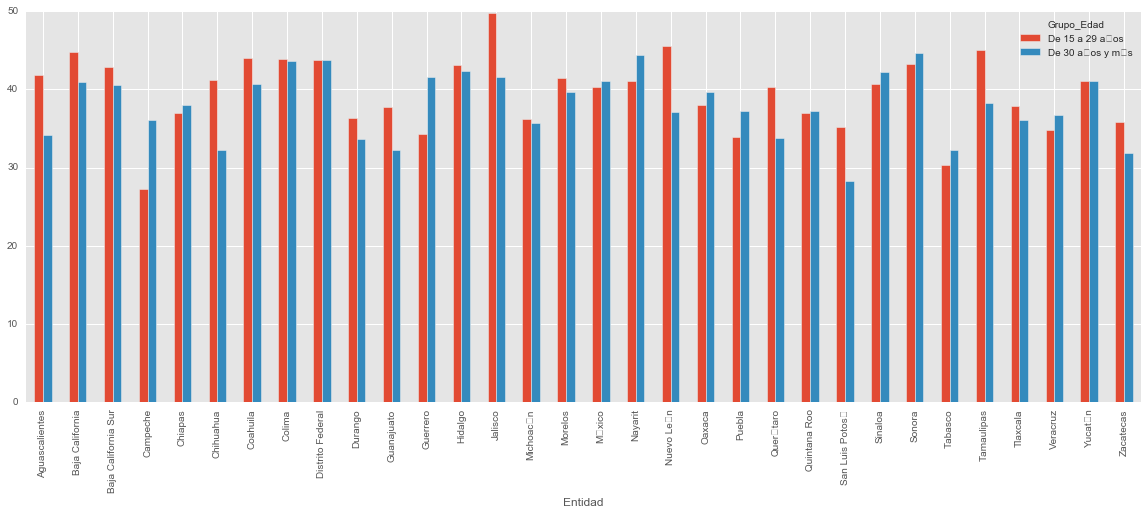

In [32]:
Brecha_1998.pivot_table(values='TNP_M', index=['Entidad'], columns=['Grupo_Edad']).plot(kind='bar')

Se observa en la gráfica que casi la mitad (17) de las entidades muestran un predominio por la tasa neta de participación femenil en el rango de edad de 15 a 29 años. Por otro lado, algunos estados o entidades muestran una tasa casi igual para las dos categorías.

Cambio la estructura del DataFrame usando la función *melt()*, esta en ayuda a cambiar la estructura de la tabla de datos es simular a la función *melt()* del paquete **reshape2** de R. La razones de porqué cambiar la estructura de la tabla son diversas, depende mucho de lo que uno esté explorando cómo uno quiere tener la relación entre las variables. En este caso es solo un ejemplo para contruir los **boxplot** y ver como se comporta la Tasa Neta de parcitipación separada por género.

In [33]:
#Se contruye un nuevo DataFrame 
L=pd.melt(Brecha_1998[['Entidad','Grupo_Edad','TNP_M','TNP_H']],id_vars=['Entidad','Grupo_Edad'],var_name='Tasa Neta Participación')
L.head()

,Entidad,Grupo_Edad,Tasa Neta Participación,value
0,Aguascalientes,De 15 a 29 a�os,TNP_M,41.860676
1,Aguascalientes,De 30 a�os y m�s,TNP_M,34.118974
2,Baja California,De 15 a 29 a�os,TNP_M,44.799607
3,Baja California,De 30 a�os y m�s,TNP_M,40.988386
4,Baja California Sur,De 15 a 29 a�os,TNP_M,42.933866


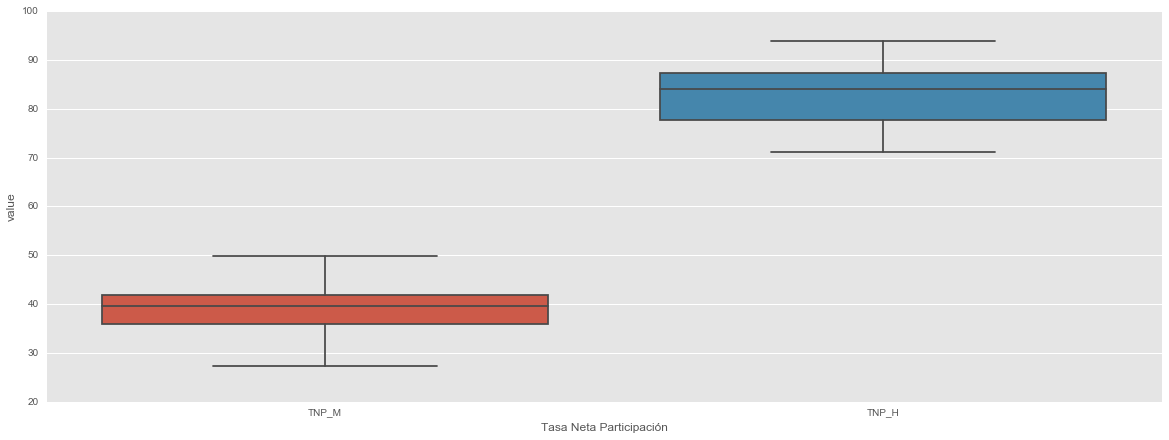

In [34]:
#Cargo otro módulo para no tener problemas con el encoding que se tiene en el sistema
#Se construye el Boxplot para los datos de DataFrame modificado
sns.boxplot(x="Tasa Neta Participación",y="value", data=L)

Se observa lo radical el la **Tasa Neta de Participación** separada por género, también se observa que la distribución es asimétrica para los dos tasas. La mediana, la línea negra en medio de la caja, muestra que del 50% al 75% ocupan una área menor de la gráfica (esto es desde la línea intermedia hasta la línea superior).

Lo que por último hago es explorar como se relacionan 4 variables, 2 de las variable de cada tabla. Lo que se revisan son las Tasas Netas para los dos géneros y por otro lado hago una tabla pivot para extraer de la tabla Informalidad los valores del porcentaje separado por género.


In [35]:
#Se contruye un DataFrame partiendo de las columnas de la tabla Brecha_1998
L2=Brecha_1998[['Entidad','Grupo_Edad','TNP_M','TNP_H']]

In [36]:
#Se contruye una tabla pivot para separar los datos del porcentaje por género
L3=Informalidad_1998.pivot_table(values='Porcentaje',index=['Entidad','Grupo_Edad'],columns=['Sexo'])

In [37]:
#Agrego de la tabla L3 los valores del porcentaje en el DataFrame L2
L2['Hombres_Informalidad']=L3['Hombres'].values
L2['Mujeres_Informalidad']=L3['Mujeres'].values

In [38]:
L2.head()

,Entidad,Grupo_Edad,TNP_M,TNP_H,Hombres_Informalidad,Mujeres_Informalidad
200,Aguascalientes,De 15 a 29 a�os,41.860676,76.475300,0.488202,0.394128
201,Aguascalientes,De 30 a�os y m�s,34.118974,87.190175,0.489154,0.468346
202,Baja California,De 15 a 29 a�os,44.799607,78.970589,0.380661,0.269278
203,Baja California,De 30 a�os y m�s,40.988386,86.232846,0.477638,0.410766
204,Baja California Sur,De 15 a 29 a�os,42.933866,76.373968,0.496833,0.411861


Se observa que el DataFrame L2 tienen las 4 variables y una más que es el Grupo de Edad, una herramienta gráfica para analizar la posible relación entre las variables es hacer un gráfico **scatterplot**. El siguiente gráfico es el ejemplo.

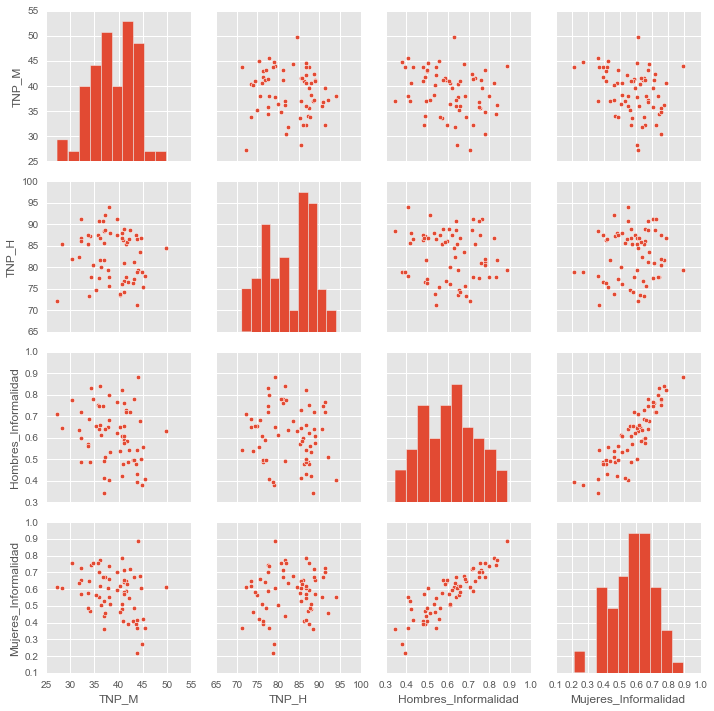

In [39]:
#Se genera el scatter plot de las variables 
sns.pairplot(L2[["TNP_M","TNP_H","Hombres_Informalidad","Mujeres_Informalidad"]])

Se observa solo una posible relación lineal entre los datos correspondientes a las tasas de informalidad, esto se observa en las gráficas correspondientes a las variables **Hombres_Informalidad vs Mujeres_Informalidad**.

Ahora contruyo una DataFrame más, en el cual agrego tanto las variables que se tienen en L2, como un par de variables dummies para representar el Grupo de Edad. La gráfica anterior puede modificarse al considerar el comportamiento de las variables por alguna de las variables dumies.

In [40]:
#Se contruyen el nuevo DataFrame
L4=pd.concat([L2,pd.get_dummies(L2.Grupo_Edad)],axis=1)
L4.columns=['Entidad','Grupo_Edad','TNP_M','TNP_H','Mujeres_Informalidad','Hombres_Informalidad','De_15_a_29','De_30_y_más']
L4.head()

,Entidad,Grupo_Edad,TNP_M,TNP_H,Mujeres_Informalidad,Hombres_Informalidad,De_15_a_29,De_30_y_más
200,Aguascalientes,De 15 a 29 a�os,41.860676,76.475300,0.488202,0.394128,1.0,0.0
201,Aguascalientes,De 30 a�os y m�s,34.118974,87.190175,0.489154,0.468346,0.0,1.0
202,Baja California,De 15 a 29 a�os,44.799607,78.970589,0.380661,0.269278,1.0,0.0
203,Baja California,De 30 a�os y m�s,40.988386,86.232846,0.477638,0.410766,0.0,1.0
204,Baja California Sur,De 15 a 29 a�os,42.933866,76.373968,0.496833,0.411861,1.0,0.0


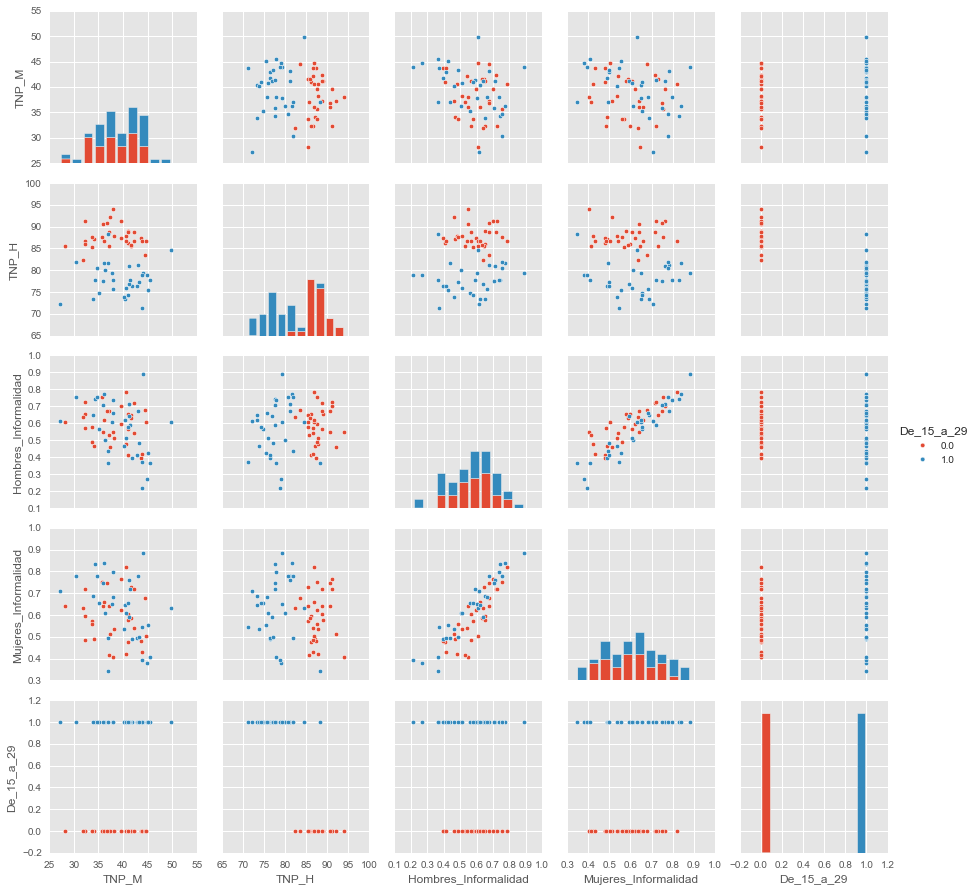

In [41]:
#Visualización del comportamiento de las variables con respecto al primero grupo de edad
sns.pairplot(L4[["TNP_M","TNP_H","Hombres_Informalidad","Mujeres_Informalidad","De_15_a_29"]],hue="De_15_a_29")

En la gráfica anterior se logra ver la separación de grupos entre la tasa neta de participación de **Hombre y Mujeres**, también entre los porcentajes de informalidad entre los dos géneros se visualizan los grupos.

Lo que creo que se puede esperar con una muestra mayor de datos, es que la separación entre las 4 variables sea más notorio, también es posible que se aprecien cambios temporales debido a que la muestra es tomada desde varios años.

**Comentario**: la exploración solo tienen la intención de mostrar algunas operaciones que se pueden hacer con los DataFrame, como lo obtenido con las funciones *concat(), melt() y tablas pivot*. También mostrar como contruir o agregar nuevas columnas con datos o cálculos y hacer algunas gráficas con a finalidad de mostrar el comportamiento de las variables con respecto las categorías y las variables entre ellas.
